01) Data Understanding

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

In [ ]:
path = '/content/drive/MyDrive/Análise de Dados/Estudo/DNC/Desafio 6/streaming_data.csv'
df = pd.read_csv(path, encoding='unicode_escape')
df.head()

#Abrindo o arquivo .csv como um dataframe dentro do Python

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
0,49.0,Male,4700.0,3.0,Basic,NaN,3,NaN,0.0,a271aa56-bcfc-4f0a-91f7-b773de6b86a4
1,69.0,Female,6107.0,2.0,Standard,NaN,1,2.14,0.0,fe14b048-770b-4619-8ec6-485b0969ae31
2,44.0,Male,6374.0,3.0,Premium,1.0,1,1.91,1.0,0283dffd-6684-4a05-9c6f-c02098a6849d
3,26.0,Male,NaN,5.0,Basic,NaN,2,NaN,NaN,c316f2f5-3403-4a0a-82c2-c98e4b3379d2
4,18.0,NaN,1948.0,3.0,Basic,NaN,3,3.88,0.0,14879bcb-1977-4ad8-a7f9-6aa9bf7b872f


In [ ]:
df.describe()

,Age,Time_on_platform,Devices_connected,Num_streaming_services,Num_active_profiles,Avg_rating,Churned
count,66607.000000,56464.000000,52696.000000,9572.000000,77884.000000,60614.000000,61148.000000
mean,43.511072,4385.848505,2.995370,2.496239,3.002273,3.002252,0.243066
std,15.043158,2526.580859,1.414072,1.120700,1.413235,1.154963,0.428938
min,18.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,30.000000,2196.000000,2.000000,1.000000,2.000000,1.990000,0.000000
50%,43.000000,4384.000000,3.000000,2.000000,3.000000,3.010000,0.000000
75%,57.000000,6573.000000,4.000000,4.000000,4.000000,4.000000,0.000000
max,69.000000,8759.000000,5.000000,4.000000,5.000000,5.000000,1.000000


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77884 entries, 0 to 77883
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     66607 non-null  float64
 1   Gender                  63368 non-null  object 
 2   Time_on_platform        56464 non-null  float64
 3   Devices_connected       52696 non-null  float64
 4   Subscription_type       52663 non-null  object 
 5   Num_streaming_services  9572 non-null   float64
 6   Num_active_profiles     77884 non-null  int64  
 7   Avg_rating              60614 non-null  float64
 8   Churned                 61148 non-null  float64
 9   User_id                 77884 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 5.9+ MB


In [ ]:
df.isnull().sum()

,0
Age,11277
Gender,14516
Time_on_platform,21420
Devices_connected,25188
Subscription_type,25221
Num_streaming_services,68312
Num_active_profiles,0
Avg_rating,17270
Churned,16736
User_id,0


02) Data Preparation

> Adicionar aspas



In [ ]:
# Substituir valores NaN por 0
df = df.fillna(0)


In [ ]:
df.isnull().sum()

,0
Age,0
Gender,0
Time_on_platform,0
Devices_connected,0
Subscription_type,0
Num_streaming_services,0
Num_active_profiles,0
Avg_rating,0
Churned,0
User_id,0


In [ ]:
# Dropar linhas onde o valor seja 0 nas colunas especificadas
df = df[(df['Gender'] != 0) & (df['Subscription_type'] != 0) & (df['Age'] != 0) & (df['Avg_rating'] != 0)]
df.head()

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
1,69.0,Female,6107.0,2.0,Standard,0.0,1,2.14,0.0,fe14b048-770b-4619-8ec6-485b0969ae31
2,44.0,Male,6374.0,3.0,Premium,1.0,1,1.91,1.0,0283dffd-6684-4a05-9c6f-c02098a6849d
9,21.0,Female,112.0,2.0,Basic,0.0,3,2.57,1.0,c6f0b9be-dd53-42a3-8efd-1ad7dcdda167
11,61.0,Male,5389.0,3.0,Standard,0.0,4,3.92,0.0,8f62edd7-4fe0-45c2-98b9-2951e4bef897
14,44.0,Male,4198.0,1.0,Basic,0.0,3,2.59,0.0,5417ca3a-b300-4429-b227-3bc75fbb2c1d


In [ ]:
# Substituir os valores 0 e 1 por "No" e "Yes"
df['Churned'] = df['Churned'].replace({0: 'No', 1: 'Yes'})

df.head()

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
1,69.0,Female,6107.0,2.0,Standard,0.0,1,2.14,No,fe14b048-770b-4619-8ec6-485b0969ae31
2,44.0,Male,6374.0,3.0,Premium,1.0,1,1.91,Yes,0283dffd-6684-4a05-9c6f-c02098a6849d
9,21.0,Female,112.0,2.0,Basic,0.0,3,2.57,Yes,c6f0b9be-dd53-42a3-8efd-1ad7dcdda167
11,61.0,Male,5389.0,3.0,Standard,0.0,4,3.92,No,8f62edd7-4fe0-45c2-98b9-2951e4bef897
14,44.0,Male,4198.0,1.0,Basic,0.0,3,2.59,No,5417ca3a-b300-4429-b227-3bc75fbb2c1d


In [ ]:
df['Age'] = df['Age'].astype(int)
df['Time_on_platform'] = df['Time_on_platform'].astype(int)
df['Devices_connected'] = df['Devices_connected'].astype(int)
df['Num_streaming_services'] = df['Num_streaming_services'].astype(int)

#Transformando valores floats em valores inteiros (exceto rating para não perder informação)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28446 entries, 1 to 77883
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     28446 non-null  int64  
 1   Gender                  28446 non-null  object 
 2   Time_on_platform        28446 non-null  int64  
 3   Devices_connected       28446 non-null  int64  
 4   Subscription_type       28446 non-null  object 
 5   Num_streaming_services  28446 non-null  int64  
 6   Num_active_profiles     28446 non-null  int64  
 7   Avg_rating              28446 non-null  float64
 8   Churned                 28446 non-null  object 
 9   User_id                 28446 non-null  object 
dtypes: float64(1), int64(5), object(4)
memory usage: 2.4+ MB


Etapa 03) Modelagem dos Dados - Regressão Logística

In [ ]:
scaler = MinMaxScaler()
# padronizando dados numéricos
columns_to_scale = ['Avg_rating', 'Time_on_platform', 'Devices_connected', 'Num_streaming_services','Age','Num_active_profiles']
df_scaled = scaler.fit_transform(df[columns_to_scale])
df_scaled = pd.DataFrame(df_scaled, columns=columns_to_scale)
df_scaled.index = df.index
df_scaled.head()

,Avg_rating,Time_on_platform,Devices_connected,Num_streaming_services,Age,Num_active_profiles
1,0.2850,0.697226,0.4,0.00,1.000000,0.00
2,0.2275,0.727709,0.6,0.25,0.509804,0.00
9,0.3925,0.012787,0.4,0.00,0.058824,0.50
11,0.7300,0.615253,0.6,0.00,0.843137,0.75
14,0.3975,0.479278,0.2,0.00,0.509804,0.50


In [ ]:
# numerificando dados categóricos

encoder = LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'])
# The following line has been modified to join the new dummy columns to the original dataframe.
subscription_dummies = pd.get_dummies(df['Subscription_type'], prefix='Subscription_type') # Create dummy variables with prefix
df = df.join(subscription_dummies) # Join dummy variables to the original DataFrame
df = df.drop('Subscription_type', axis=1) # Drop the original 'Subscription_type' column
categorical_columns = ['Gender'] + list(subscription_dummies.columns) # Update categorical_columns to include dummy columns
df_encoded = df[categorical_columns]
df_encoded.index = df.index
df_encoded.head()


,Gender,Subscription_type_Basic,Subscription_type_Premium,Subscription_type_Standard
1,0,False,False,True
2,1,False,True,False
9,0,True,False,False
11,1,False,False,True
14,1,True,False,False


In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28446 entries, 1 to 77883
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Gender                      28446 non-null  int64
 1   Subscription_type_Basic     28446 non-null  bool 
 2   Subscription_type_Premium   28446 non-null  bool 
 3   Subscription_type_Standard  28446 non-null  bool 
dtypes: bool(3), int64(1)
memory usage: 527.8 KB


In [ ]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28446 entries, 1 to 77883
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Avg_rating              28446 non-null  float64
 1   Time_on_platform        28446 non-null  float64
 2   Devices_connected       28446 non-null  float64
 3   Num_streaming_services  28446 non-null  float64
 4   Age                     28446 non-null  float64
 5   Num_active_profiles     28446 non-null  float64
dtypes: float64(6)
memory usage: 1.5 MB


03) Model Training

In [ ]:
#definindo variáveis X e Y

X = pd.concat([df_scaled, df_encoded], axis=1)
y = df['Churned'].dropna().reset_index(drop=True).copy()

In [ ]:

X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28446 entries, 1 to 77883
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Avg_rating                  28446 non-null  float64
 1   Time_on_platform            28446 non-null  float64
 2   Devices_connected           28446 non-null  float64
 3   Num_streaming_services      28446 non-null  float64
 4   Age                         28446 non-null  float64
 5   Num_active_profiles         28446 non-null  float64
 6   Gender                      28446 non-null  int64  
 7   Subscription_type_Basic     28446 non-null  bool   
 8   Subscription_type_Premium   28446 non-null  bool   
 9   Subscription_type_Standard  28446 non-null  bool   
dtypes: bool(3), float64(6), int64(1)
memory usage: 1.8 MB


In [ ]:
#Dividindo a base entre treino e teste

x_train , x_test , y_train , y_test = train_test_split(X,y,test_size=0.1,random_state=42)

In [ ]:
RFC = RandomForestClassifier().fit(x_train,y_train)

#criando o modelo 2 (Random Forest)

In [ ]:
#Fazendo teste do modelo 2

rfc_pred = RFC.predict(x_test)

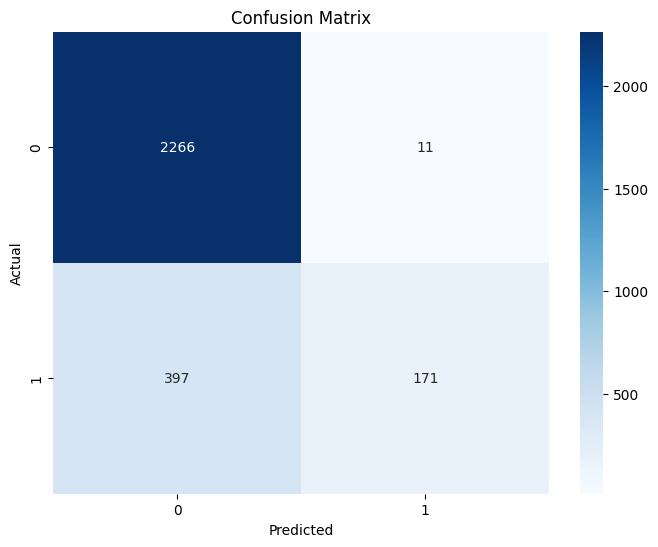

In [ ]:
# Plotar a matriz de confusão
conf_matrix = confusion_matrix(y_test, rfc_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Imprimir métricas de avaliação
print("Accuracy:", accuracy_score(y_test, rfc_pred))
print("Precision:", precision_score(y_test, rfc_pred, pos_label='Yes')) # Change pos_label to 'Yes'
print("Recall:", recall_score(y_test, rfc_pred, pos_label='Yes')) # Change pos_label to 'Yes'
print("F1 Score:", f1_score(y_test, rfc_pred, pos_label='Yes')) # Change pos_label to 'Yes'
print("\nClassification Report:\n", classification_report(y_test, rfc_pred))

Accuracy: 0.8565905096660809
Precision: 0.9395604395604396
Recall: 0.301056338028169
F1 Score: 0.456

Classification Report:
               precision    recall  f1-score   support

          No       0.85      1.00      0.92      2277
         Yes       0.94      0.30      0.46       568

    accuracy                           0.86      2845
   macro avg       0.90      0.65      0.69      2845
weighted avg       0.87      0.86      0.83      2845



In [ ]:
grid_search_rfc = GridSearchCV(estimator=RFC, param_grid={'n_estimators': [100, 600, 2000]}, cv=5).fit(x_train, y_train)

In [ ]:
results = pd.DataFrame(grid_search_rfc.cv_results_)
results.sort_values(by='mean_test_score', ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
2,72.852466,1.237206,2.918854,0.096590,2000,{'n_estimators': 2000},0.844366,0.843359,0.843555,0.843359,0.847656,0.844459,0.001641,1
0,4.479994,1.260677,0.161873,0.042307,100,{'n_estimators': 100},0.842804,0.842187,0.844727,0.843945,0.845703,0.843873,0.001270,2
1,22.218576,1.086024,0.751896,0.011167,600,{'n_estimators': 600},0.842218,0.843555,0.843359,0.842578,0.847266,0.843795,0.001803,3


In [ ]:
grid_search_rfc.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 2000,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
#Treinando o modelo tunado 2
RFC_tuned_1 = RandomForestClassifier(n_estimators = 2000).fit(x_train,y_train)

In [ ]:
rfc_pred_tuned = RFC_tuned_1.predict(x_test)

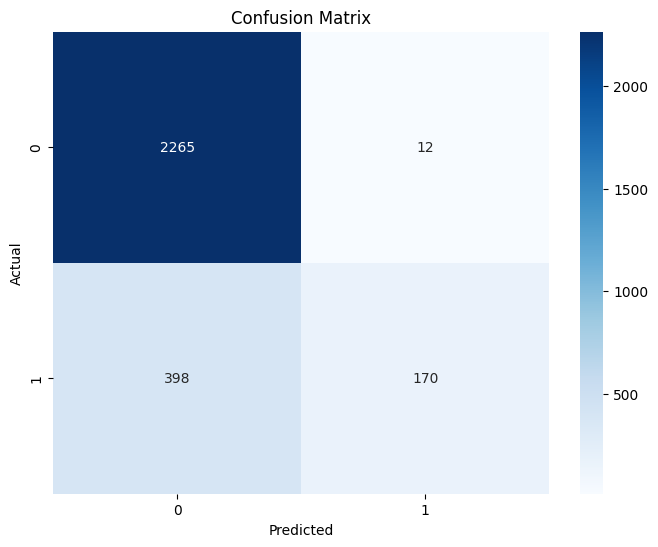

In [ ]:
# Plotar a matriz de confusão
conf_matrix = confusion_matrix(y_test, rfc_pred_tuned)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Imprimir métricas de avaliação
print("Accuracy:", accuracy_score(y_test, rfc_pred_tuned))
print("Precision:", precision_score(y_test, rfc_pred_tuned, pos_label='Yes')) # Change pos_label to 'Yes'
print("Recall:", recall_score(y_test, rfc_pred_tuned, pos_label='Yes')) # Change pos_label to 'Yes'
print("F1 Score:", f1_score(y_test, rfc_pred_tuned, pos_label='Yes')) # Change pos_label to 'Yes'
print("\nClassification Report:\n", classification_report(y_test, rfc_pred_tuned))

Accuracy: 0.8558875219683656
Precision: 0.9340659340659341
Recall: 0.2992957746478873
F1 Score: 0.4533333333333333

Classification Report:
               precision    recall  f1-score   support

          No       0.85      0.99      0.92      2277
         Yes       0.93      0.30      0.45       568

    accuracy                           0.86      2845
   macro avg       0.89      0.65      0.69      2845
weighted avg       0.87      0.86      0.82      2845

